# Compare Atomic Files


This notebook shows how to compare atomic files generated by Carsus.

In [54]:
!echo $XUVTOP

/home/atharva/workspace/code/tardis-main/data/CHIANTI_v9.0.1_database


In [1]:
import os
import logging
import pandas as pd
# from carsus.io import AtomDataCompare

In [2]:
ATOM1_PATH = os.environ.get("ATOM1_PATH", None)
ATOM2_PATH = os.environ.get("ATOM2_PATH", None)

In [3]:
ATOM1_PATH="/home/atharva/workspace/code/tardis-main/refdata/atom_data/kurucz_cd23_chianti_H_He.h5"
ATOM2_PATH="/home/atharva/workspace/code/tardis-main/search_atomic_file/b9c03a59965bfeac015f3b8af67c5f941d731f65.h5"

In [6]:
atc = AtomDataCompare(ATOM1_PATH, ATOM2_PATH)

A brief overview of what keys match can be seen using the comparison table.

In [7]:
atc.d2.keys()

['/atom_data',
 '/ionization_data',
 '/levels',
 '/lines',
 '/macro_atom_data',
 '/macro_atom_references',
 '/zeta_data']

In [8]:
atc.compare()

,exists_1,exists_2,match
atom_data,True,True,False
collision_data_temperatures,True,False,False
collisions,True,False,False
ionization_data,True,True,False
levels,True,True,False
lines,True,True,False
macro_atom_data,True,True,False
macro_atom_references,True,True,False
zeta_data,True,True,True


One can investigate further into the difference between the dataframes using the `key_diff` method. The `key_diff` method currently supports differentiating `levels`, `lines` and the `collisions` dataframes.

In [15]:
atc.key_diff("levels")

In [42]:
atc.key_diff("lines")

One can also investigate specific ions:

In [43]:
atc.ion_diff("lines",(6,0))

In [44]:
atc.ion_diff("lines",(14,0), style_axis=None)

In [45]:
atc.ion_diff("levels",(1,0))

,pct_change_energy,pct_change_g
level_number,,
1,-1,0
2,-1,0


Both the `ion_diff` and `key_diff` methods allow displaying detailed information:

In [46]:
atc.ion_diff("lines",(3,0), simplify_output=False, style=False)

line_id_1  line_id_2  matches_line_id  \
level_number_lower level_number_upper                                          
24                 32                       1986       1692            False   
28                 36                       2088       1895            False   
                   42                       2021       1833            False   
                   50                       1968       1812            False   
                   56                       1948       1796            False   
30                 44                       2013       1832            False   
                   58                       1945       1795            False   
32                 40                       2070       1863            False   
                   46                       2009       1853            False   
38                 50                       2087       2031            False   
                   56                       2047       1972            False   
                   68                       2002       1927            False   
46                 58                       2117       1992            False   
52                 68                       2106       2104            False   

                                        wavelength_1   wavelength_2  \
level_number_lower level_number_upper                                 
24                 32                   40491.896682    6105.353694   
28                 36                   77135.913053   24471.345834   
                   42                   47110.191937   17550.874174   
                   50                   37640.216756   13561.454472   
                   56                   33075.640263   12241.003827   
30                 44                   46531.972387   17550.828161   
                   58                   32955.878639   12240.991824   
32                 40                   74576.777639   19279.967642   
                   46                   46518.335671   18708.126033   
38                 50                   76083.467241   54654.278597   
                   56                   59488.897023   38093.687299   
                   68                   43823.973537   28426.688971   
46                 58                  113091.463953   40542.049346   
52                 68                  105557.600728  102891.134031   

                                       matches_wavelength  \
level_number_lower level_number_upper                       
24                 32                               False   
28                 36                               False   
                   42                               False   
                   50                               False   
                   56                               False   
30                 44                               False   
                   58                               False   
32                 40                               False   
                   46                               False   
38                 50                               False   
                   56                               False   
                   68                               False   
46                 58                               False   
52                 68                               False   

                                       pct_change_wavelength    f_ul_1  \
level_number_lower level_number_upper                                    
24                 32                              -0.849220  0.037317   
28                 36                              -0.682750  0.012132   
                   42                              -0.627451  0.024433   
                   50                              -0.639708  0.000966   
                   56                              -0.629909  0.000490   
30                 44                              -0.622822  0.006208   
                   58                              -

In [47]:
pd.set_option('display.max_rows', None)
atc.lines1.loc[(3,0)].sort_index()

line_id     wavelength      f_ul  \
level_number_lower level_number_upper                                     
0                  14                     1654    3233.564180  0.001399   
                   15                     1653    3233.564180  0.001396   
                   19                     1650    2741.996049  0.001309   
                   20                     1651    2741.996049  0.001306   
                   26                     1647    2563.070281  0.000787   
                   27                     1648    2563.070281  0.000785   
                   36                     1644    2475.779914  0.000483   
                   43                     1641    2426.149514  0.000314   
1                  5                      1724    6709.927055  0.251171   
                   6                      1723    6709.926054  0.251171   
                   7                      1717    6709.776014  0.251154   
                   7                      1718    6709.776014  0.251154   
                   7                      1719    6709.776014  0.251154   
2                  5                      1722    6709.922053  0.251171   
                   6                      1721    6709.921053  0.251171   
                   7                      1714    6709.770013  0.251154   
                   7                      1715    6709.770013  0.251154   
3                  8                      1720    6709.777014  0.251171   
                   9                      1716    6709.775014  0.251171   
                   11                     1709    6709.624974  0.251154   
                   11                     1710    6709.624974  0.251154   
                   11                     1711    6709.624974  0.251154   
4                  8                      1713    6709.752008  0.251171   
                   9                      1712    6709.751007  0.251171   
                   11                     1706    6709.600967  0.251154   
                   11                     1707    6709.600967  0.251154   
                   11                     1708    6709.600967  0.251154   
10                 13                     1734    8128.465486  0.108136   
                   16                     1690    6105.227660  0.315457   
                   18                     1688    4973.048338  0.012559   
                   21                     1681    4604.115566  0.060945   
                   25                     1678    4274.267616  0.004217   
                   28                     1675    4133.727736  0.022958   
                   34                     1672    3986.612256  0.001991   
                   37                     1669    3916.403943  0.011401   
                   41                     1666    3836.660186  0.001112   
                   44                     1663    3796.083644  0.006561   
                   48                     1661    3747.596063  0.000690   
                   51                     1658    3721.880399  0.004159   
                   58                     1655    3672.657660  0.002805   
12                 13                     1735    8128.686545  0.215760   
                   16                     1692    6105.353694  0.062942   
                   17                     1691    6105.338690  0.382691   
                   18                     1689    4973.131360  0.025059   
                   21                     1683    4604.186584  0.012160   
                   22                     1682    4604.183584  0.073935   
                   25                     1679    4274.329633  0.008413   
                   28                     1677    4133.784751  0.004581   
                   29                     1676    4133.783750  0.027852   
                   34                     1673    3986.665270  0.003972   
                   37                     1671    3916.455957  0.002275   
                   38                     1670    3916.454956  0

In [48]:
atc.lines2.loc[(3,0)].sort_index()

line_id     wavelength      f_ul  \
level_number_lower level_number_upper                                     
0                  28                     1654    3233.564180  0.001399   
                   30                     1653    3233.564180  0.001396   
                   38                     1650    2741.996049  0.001309   
                   40                     1651    2741.996049  0.001306   
                   52                     1647    2563.070281  0.000787   
                   54                     1648    2563.070281  0.000785   
                   72                     1644    2475.779914  0.000483   
                   86                     1641    2426.149514  0.000314   
2                  10                     1724    6709.927055  0.251171   
                   12                     1723    6709.926054  0.251171   
                   14                     1717    6709.776014  0.251154   
                   14                     1718    6709.776014  0.251154   
                   14                     1719    6709.776014  0.251154   
4                  10                     1722    6709.922053  0.251171   
                   12                     1721    6709.921053  0.251171   
                   14                     1714    6709.770013  0.251154   
                   14                     1715    6709.770013  0.251154   
6                  16                     1720    6709.777014  0.251171   
                   18                     1716    6709.775014  0.251171   
                   22                     1709    6709.624974  0.251154   
                   22                     1710    6709.624974  0.251154   
                   22                     1711    6709.624974  0.251154   
8                  16                     1713    6709.752008  0.251171   
                   18                     1712    6709.751007  0.251171   
                   22                     1706    6709.600967  0.251154   
                   22                     1707    6709.600967  0.251154   
                   22                     1708    6709.600967  0.251154   
20                 26                     1734    8128.465486  0.108136   
                   32                     1690    6105.227660  0.315457   
                   36                     1688    4973.048338  0.012559   
                   42                     1681    4604.115566  0.060945   
                   50                     1678    4274.267616  0.004217   
                   56                     1675    4133.727736  0.022958   
                   68                     1672    3986.612256  0.001991   
                   74                     1669    3916.403943  0.011401   
                   82                     1666    3836.660186  0.001112   
                   88                     1663    3796.083644  0.006561   
                   96                     1661    3747.596063  0.000690   
                   102                    1658    3721.880399  0.004159   
                   114                    1655    3672.657660  0.002805   
24                 26                     1735    8128.686545  0.215760   
                   32                     1692    6105.353694  0.062942   
                   34                     1691    6105.338690  0.382691   
                   36                     1689    4973.131360  0.025059   
                   42                     1683    4604.186584  0.012160   
                   44                     1682    4604.183584  0.073935   
                   50                     1679    4274.329633  0.008413   
                   56                     1677    4133.784751  0.004581   
                   58                     1676    4133.783750  0.027852   
                   68                     1673    3986.665270  0.003972   
                   74                     1671    3916.455957  0.002275   
                   76                     1670    3916.454956  0

But these complex dataframes can also be represented in smaller formats:

In [49]:
atc.ion_diff("lines","He",return_summary=True)

,total_rows,matches_line_id,matches_wavelength,matches_f_ul,matches_f_lu,matches_nu,matches_B_lu,matches_B_ul,matches_A_ul
values,9,0,0,0,0,0,0,0,0


Specific columns can be plotted:

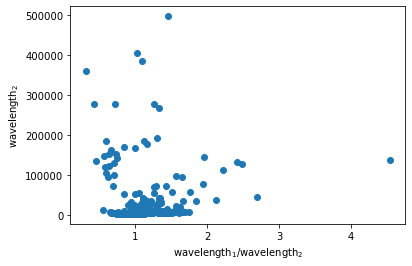

In [50]:
atc.plot_ion_diff(key_name="lines", ion="Fe", column="wavelength")

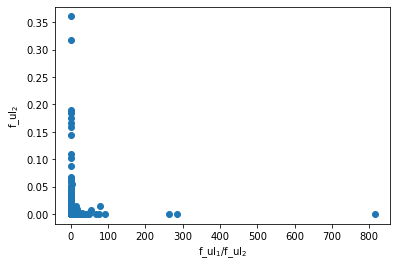

In [51]:
atc.plot_ion_diff(key_name="lines", ion=(23,0), column="f_ul")

The dataframes are available as attributes as well:

In [52]:
atc.lines1

In [ ]:
atc.lines2

Finally, open HDF files can be closed.

In [ ]:
atc.teardown()

In [ ]:
import functools
import logging
from carsus.util import parse_selected_species, convert_atomic_number2symbol
from collections import defaultdict

from collections import defaultdict
import matplotlib.pyplot as plt

LIGHT_GREEN = "#BCF5A9"
LIGHT_RED = "#F5A9A9"


def highlight_values(val):
    """
    Return hex string of background color.
    Parameters
    ----------
    val : bool
    Returns
    -------
    string
    """
    if val == True:
        return f"background-color: {LIGHT_GREEN}"
    else:
        return f"background-color: {LIGHT_RED}"


class AtomDataCompare(object):
    """
    Differentiate between two Carsus atomic files.
    Parameters
    ----------
    d1_path : string
        Path to the first file.
    d2_path : string
        Path to the second file.
    alt_keys : dict, optional
        Alternate names to dataframes inside the atomic files.
        For example, the `lines` dataframe was used to be called `lines_data` in earlier carsus versions.
    """

    def __init__(self, d1_path=None, d2_path=None, alt_keys={}):
        self.d1_path = d1_path
        self.d2_path = d2_path
        self.alt_keys_default = {
            "lines": ["lines_data", "lines"],
            "levels": ["levels_data", "levels"],
            "collisions": ["collisions_data", "collision_data"],
            "photoionization_data": ["photoionization_data"],
        }
        self.alt_keys_default = defaultdict(list, self.alt_keys_default)
        self.setup(alt_keys=alt_keys)

    def set_keys_as_attributes(self, alt_keys={}):
        """
        Set dataframes as attributes.
        Parameters
        ----------
        alt_keys : dict, optional
            Alternate names to dataframes inside the atomic files. Defaults to {}.
        """
        # alt keys should be a subset of this self.alt_keys_default
        # other keys would be ignored

        for key, val in self.alt_keys_default.items():
            if alt_keys.get(key, None):
                self.alt_keys_default[key].extend(alt_keys[key])

            for item in val:
                if self.d1.get_node(item):
                    setattr(self, f"{key}1", self.d1[item])
                if self.d2.get_node(item):
                    setattr(self, f"{key}2", self.d2[item])

    def setup(self, alt_keys={}):
        """
        Opeb HDF files using Pandas HDFStore.
        Parameters
        ----------
        alt_keys : dict, optional
            Alternate names to dataframes inside the atomic files. Defaults to {}.
        """
        self.d1 = pd.HDFStore(self.d1_path)
        self.d2 = pd.HDFStore(self.d2_path)
        self.set_keys_as_attributes(alt_keys=alt_keys)

    def teardown(self):
        """
        Close open HDF files.
        """
        self.d1.close()
        self.d2.close()

    def verify_key_diff(self, key_name):
        """
        Check if dataframes can be compared.
        Parameters
        ----------
        key_name : string
        """
        try:
            df1 = getattr(self, f"{key_name}1")
            df2 = getattr(self, f"{key_name}2")
        except AttributeError as exc:
            raise Exception(
                f"Either key_name: {key_name} is invalid or keys are not set. "
                "Please use the set_keys_as_attributes method to set keys as attributes for comparison."
            )

        species1 = df1.index.get_level_values("atomic_number")
        species1 = set([convert_atomic_number2symbol(item) for item in species1])

        species2 = df2.index.get_level_values("atomic_number")
        species2 = set([convert_atomic_number2symbol(item) for item in species2])

        species_diff = species1.symmetric_difference(species2)
        if len(species_diff):
            print(f"Elements not in common in both dataframes: {species_diff}")

        common_columns = df2.columns.intersection(df1.columns)
        if common_columns.empty:
            raise ValueError("There are no common columns for comparison. Exiting.")

        mismatched_cols = df2.columns.symmetric_difference(df1.columns)
        if not mismatched_cols.empty:
            logger.warning("Columns do not match.")
            logger.warning(f"Mismatched columns: {mismatched_cols}")
            logger.info(f"Using common columns for comparison:{common_columns}")

        if df1.index.names != df2.index.names:
            raise ValueError("Index names do not match.")

        setattr(self, f"{key_name}_columns", common_columns)

    def ion_diff(
        self,
        key_name,
        ion,
        rtol=1e-07,
        simplify_output=True,
        return_summary=False,
        style=True,
        style_axis=0,
    ):
        """
        Compare two dataframes- ion wise.
        Parameters
        ----------
        key_name : string
        ion: string or tuple
        rtol: int
        simplify_output: bool
        return_summary: bool
        style: bool
        style_axis: int or None
        """
        try:
            df1 = getattr(self, f"{key_name}1")
            df2 = getattr(self, f"{key_name}2")
        except AttributeError as exc:
            raise Exception(
                f"Either key_name: {key_name} is invalid or keys are not set."
                "Please use the set_keys_as_attributes method to set keys as attributes for comparison."
            )

        if not hasattr(self, f"{key_name}_columns"):
            self.verify_key_diff(key_name)

        common_columns = getattr(self, f"{key_name}_columns")

        if not isinstance(ion, tuple):
            parsed_ion = parse_selected_species(ion)[0]
        else:
            parsed_ion = ion

        try:
            df1 = df1.loc[parsed_ion]
            df2 = df2.loc[parsed_ion]
        except KeyError as exc:
            raise Exception(
                "The element does not exist in one of the dataframes."
            ) from exc

        merged_df = pd.merge(
            df1,
            df2,
            left_index=True,
            right_index=True,
            suffixes=["_1", "_2"],
        )

        non_numeric_cols = ["line_id", "metastable"]  # TODO
        common_cols_rearranged = []

        for item in common_columns:
            if item in non_numeric_cols:
                merged_df[f"matches_{item}"] = (
                    merged_df[f"{item}_1"] == merged_df[f"{item}_2"]
                )
                common_cols_rearranged.extend(
                    [
                        f"{item}_1",
                        f"{item}_2",
                        f"matches_{item}",
                    ]
                )
            else:
                merged_df[f"matches_{item}"] = np.isclose(
                    merged_df[f"{item}_1"], merged_df[f"{item}_2"], rtol=rtol
                )
                merged_df[f"pct_change_{item}"] = merged_df[
                    [f"{item}_1", f"{item}_2"]
                ].pct_change(axis=1)[f"{item}_2"]

                merged_df[f"pct_change_{item}"] = merged_df[
                    f"pct_change_{item}"
                ].fillna(0)

                common_cols_rearranged.extend(
                    [f"{item}_1", f"{item}_2", f"matches_{item}", f"pct_change_{item}"]
                )

        merged_df = merged_df[common_cols_rearranged]
        merged_df = merged_df.sort_values(by=merged_df.index.names, axis=0)
        merged_df.apply(
            lambda column: column.abs() if column.dtype.kind in "iufc" else column
        )

        if return_summary:
            summary_dict = {}
            summary_dict["total_rows"] = len(merged_df)

            for column in merged_df.copy().columns:
                if column.startswith("matches_"):
                    summary_dict[column] = (
                        merged_df[column].copy().value_counts().get(True, 0)
                    )
            summary_df = pd.DataFrame(summary_dict, index=["values"])
            return summary_df

        if simplify_output:
            matches_cols = [
                column for column in merged_df.columns if column.startswith("matches")
            ]
            conditions = [merged_df[column] != True for column in matches_cols]

            merged_df = self.simplified_df(merged_df.copy())  # TODO
            merged_df = merged_df[functools.reduce(np.logical_or, conditions)]

            if merged_df.empty:
                print("All the values in both the dataframes match.")
                return None

            merged_df = merged_df.drop(
                columns=[
                    column
                    for column in merged_df.columns
                    if column.startswith("matches")
                ]
            )

        if style:
            pct_change_subset = [
                column
                for column in merged_df.columns
                if column.startswith("pct_change")
            ]
            return merged_df.style.background_gradient(
                cmap="Reds", subset=pct_change_subset, axis=style_axis
            )

        return merged_df

    def key_diff(
        self, key_name, rtol=1e-07, simplify_output=True, style=True, style_axis=0
    ):
        """
        Compare two dataframes.
        Parameters
        ----------
        key_name : string
        simplify_output: bool
        style: bool
        style_axis: int or None
        """
        if not hasattr(self, f"{key_name}_columns"):
            self.verify_key_diff(key_name)

        df1 = getattr(self, f"{key_name}1")
        df2 = getattr(self, f"{key_name}2")

        ions1 = set(
            [(atomic_number, ion_number) for atomic_number, ion_number, *_ in df1.index]
        )
        ions2 = set(
            [(atomic_number, ion_number) for atomic_number, ion_number, *_ in df2.index]
        )

        ions = set(ions1).intersection(ions2)
        ion_diffs = []
        for ion in ions:
            ion_diff = self.ion_diff(
                key_name=key_name, ion=ion, rtol=rtol, return_summary=True
            )
            ion_diff["atomic_number"], ion_diff["ion_number"] = ion
            ion_diff = ion_diff.set_index(["atomic_number", "ion_number"])
            ion_diffs.append(ion_diff)
        key_diff = pd.concat(ion_diffs)

        columns = key_diff.columns
        for column in columns:
            if column.startswith("matches"):
                key_diff[column] = key_diff["total_rows"] - key_diff[column]
                key_diff = key_diff.rename(columns={column: f"not_{column}"})
        key_diff = key_diff.sort_values(["atomic_number", "ion_number"])

        subset = [
            column for column in key_diff.columns if column.startswith("not_matches")
        ]
        conditions = [key_diff[column] != 0 for column in subset]

        if simplify_output:
            key_diff = key_diff[functools.reduce(np.logical_or, conditions)]

        if style:
            return key_diff.style.background_gradient(
                cmap="Reds", subset=subset, axis=style_axis
            )

        return key_diff

    def generate_comparison_table(self):
        """
        Generate empty comparison table.
        """
        for index, file in enumerate((self.d1, self.d2)):
            # create a dict to contain names of keys in the file
            # and their alternate(more recent) names
            file_keys = {item[1:]: item[1:] for item in file.keys()}
            for original_keyname in self.alt_keys_default.keys():
                for file_key in file_keys.keys():
                    alt_key_names = self.alt_keys_default.get(original_keyname, [])

                    if file_key in alt_key_names:
                        # replace value with key name in self.alt_keys_default
                        file_keys[file_key] = original_keyname

            # flip the dict to create the dataframe
            file_keys = {v: k for k, v in file_keys.items()}
            df = pd.DataFrame(file_keys, index=["file_keys"]).T
            df["exists"] = True
            setattr(self, f"d{index+1}_df", df)

        joined_df = self.d1_df.join(self.d2_df, how="outer", lsuffix="_1", rsuffix="_2")
        joined_df[["exists_1", "exists_2"]] = joined_df[
            ["exists_1", "exists_2"]
        ].fillna(False)
        self.comparison_table = joined_df
        self.comparison_table["match"] = None

    def compare(self, exclude_correct_matches=False, drop_file_keys=True, style=True):
        """
        Compare the two HDF files.
        Parameters
        ----------
        exclude_correct_matches : bool
        drop_file_keys: bool
        style: bool
        """
        if not hasattr(self, "comparison_table"):
            self.generate_comparison_table()

        for index, row in self.comparison_table.iterrows():
            if row[["exists_1", "exists_2"]].all():
                row1_df = self.d1[row["file_keys_1"]]
                row2_df = self.d2[row["file_keys_2"]]
                if row1_df.equals(row2_df):
                    self.comparison_table.at[index, "match"] = True
                else:
                    self.comparison_table.at[index, "match"] = False
            else:
                self.comparison_table.at[index, "match"] = False

        if exclude_correct_matches:
            self.comparison_table = self.comparison_table[
                self.comparison_table.match == False
            ]
        if drop_file_keys:
            self.comparison_table = self.comparison_table.drop(
                columns=["file_keys_1", "file_keys_2"]
            )
        if style:
            return self.comparison_table.style.applymap(
                highlight_values, subset=["exists_1", "exists_2", "match"]
            )
        return self.comparison_table

    def simplified_df(self, df):
        """
        Drop additional columns belonging to the original dataframes but were used for comparison.
        Parameters
        ----------
        df : pd.DataFrame
        """
        df_simplified = df.drop(df.filter(regex="_1$|_2$").columns, axis=1)
        return df_simplified

    def plot_ion_diff(self, key_name, ion, column):
        """
        Plot fractional difference between properties of ions.
        Parameters
        ----------
        key_name : string
        ion: string or tuple
        column: string
        """
        df = self.ion_diff(
            key_name=key_name, ion=ion, style=False, simplify_output=False
        )
        plt.scatter(
            df[f"{column}_1"] / df[f"{column}_2"],
            df[f"{column}_2"],
        )

        plt.xlabel(f"{column}$_1$/{column}$_2$")
        plt.ylabel(f"{column}$_2$")
        plt.show()